In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file2014 = 'data/2014nwis-littlecolorado.txt'
df_2014 = pd.read_table(file2014, sep='\t', skiprows=27, index_col=2)
df_2014 = df_2014[1:]
df_2014['6278_00060'] = df_2014['6278_00060'].astype(int)

In [3]:
file2015 = 'data/2015nwis-littlecolorado.txt'
df_2015 = pd.read_table(file2015, sep='\t', skiprows=27, index_col=2)
df_2015 = df_2015[1:]
df_2015['6278_00060'] = df_2015['6278_00060'].astype(int)

In [4]:
file2016 = 'data/2016nwis-littlecolorado.txt'
df_2016 = pd.read_table(file2016, sep='\t', skiprows=26, index_col=2)
df_2016 = df_2016[1:]
df_2016['6278_00060'] = df_2016['6278_00060'].astype(int)

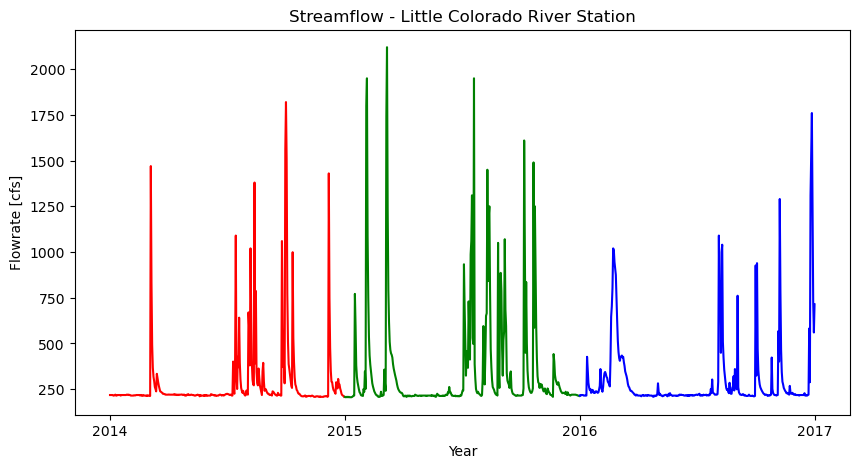

In [5]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(df_2014['6278_00060'][1::100], c='r')
ax.plot(df_2015['6278_00060'][1::100], c='g')
ax.plot(df_2016['6278_00060'][1::100], c='b')
ax.set_xticks([df_2014.index[1],df_2015.index[1],df_2016.index[1], df_2016.index[-1]])
ax.set_xticklabels(['2014','2015','2016','2017'])
ax.set_ylabel('Flowrate [cfs]')
ax.set_xlabel('Year')
ax.set_title('Streamflow - Little Colorado River Station')
plt.savefig('figures/streamflow_littlecolorado.png')

In [6]:
discharge_09402300 = 'data/29XXBUHc.txt'
discharge_09402500 = 'data/hEKc9AHL.txt'
discharge_09402000 = 'data/PdVY5_8t.txt'
discharge_09403850 = 'data/U0ImJT4n.txt'

df_09402300 = pd.read_table(discharge_09402300, sep='\t', skiprows=35)
df_09402300 = df_09402300[1:]
df_09402300['date'] = pd.to_datetime(df_09402300['year_nu'].astype(str) + '-' + df_09402300['month_nu'])
df_09402300.set_index('date')
df_09402300['mean_va'] = df_09402300['mean_va'].astype(float)

df_09402500 = pd.read_table(discharge_09402500, sep='\t', skiprows=35)
df_09402500 = df_09402500[1:]
df_09402500['date'] = pd.to_datetime(df_09402500['year_nu'].astype(str) + '-' + df_09402500['month_nu'])
df_09402500.set_index('date')
df_09402500['mean_va'] = df_09402500['mean_va'].astype(float)

df_09402000 = pd.read_table(discharge_09402000, sep='\t', skiprows=35)
df_09402000 = df_09402000[1:]
df_09402000['date'] = pd.to_datetime(df_09402000['year_nu'].astype(str) + '-' + df_09402000['month_nu'])
df_09402000.set_index('date')
df_09402000['mean_va'] = df_09402000['mean_va'].astype(float)

df_09403850 = pd.read_table(discharge_09403850, sep='\t', skiprows=35)
df_09403850 = df_09403850[1:]
df_09403850['date'] = pd.to_datetime(df_09403850['year_nu'].astype(str) + '-' + df_09403850['month_nu'])
df_09403850.set_index('date')
df_09403850['mean_va'] = df_09403850['mean_va'].astype(float)

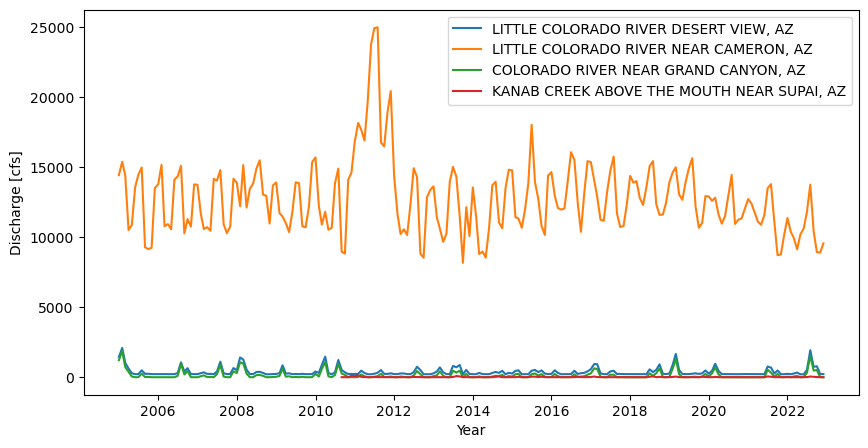

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(df_09402300['date'], df_09402300['mean_va'], label='LITTLE COLORADO RIVER DESERT VIEW, AZ')
ax.plot(df_09402500['date'], df_09402500['mean_va'], label='LITTLE COLORADO RIVER NEAR CAMERON, AZ')
ax.plot(df_09402000['date'], df_09402000['mean_va'], label='COLORADO RIVER NEAR GRAND CANYON, AZ')
ax.plot(df_09403850['date'], df_09403850['mean_va'], label='KANAB CREEK ABOVE THE MOUTH NEAR SUPAI, AZ')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Discharge [cfs]')

plt.savefig('figures/streamflow_multistation.png')

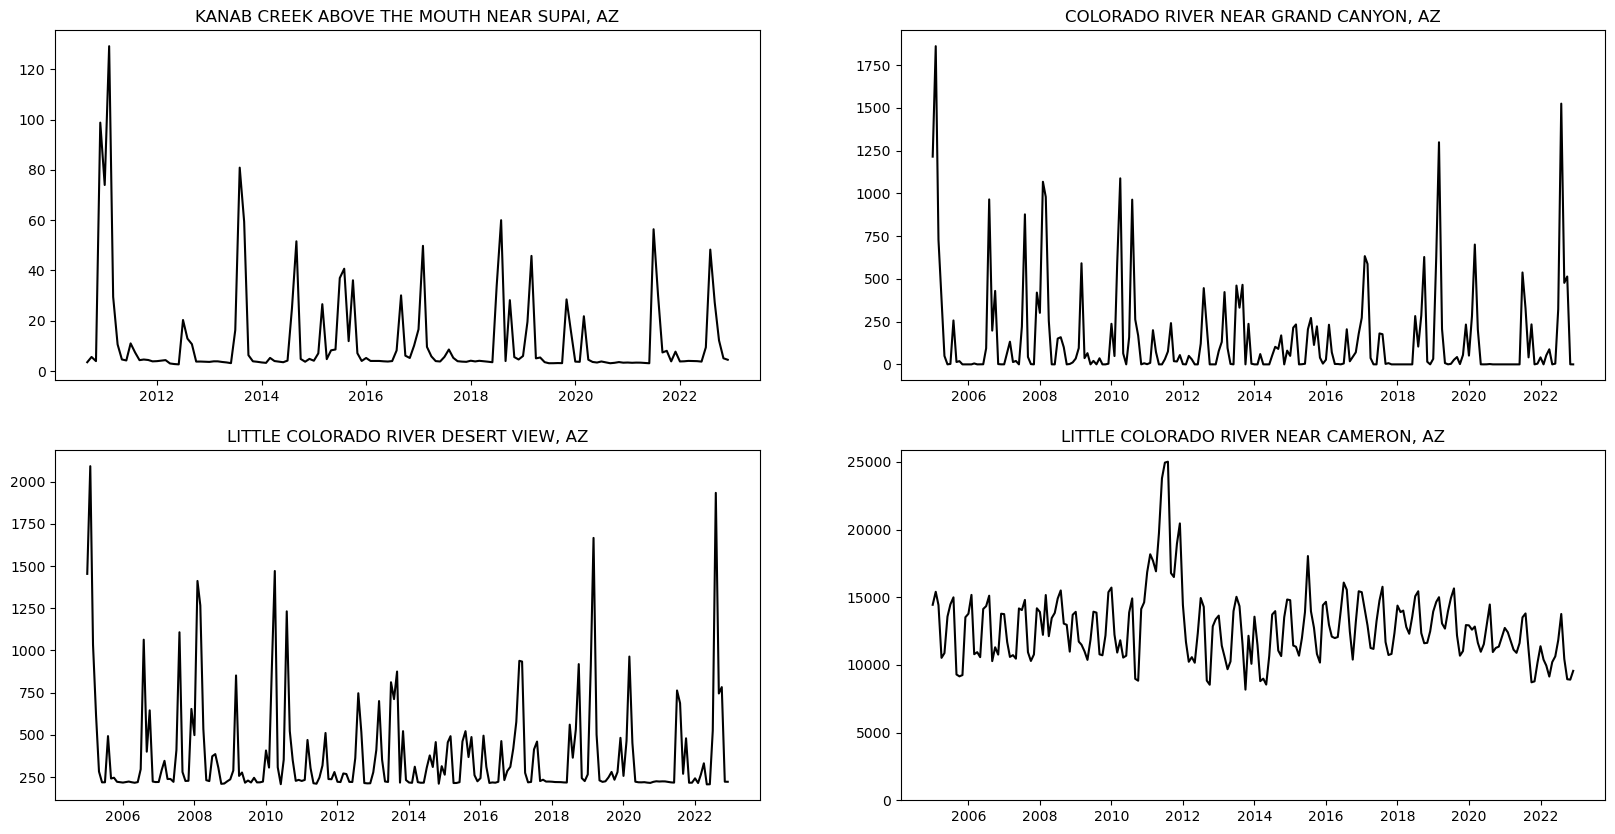

In [8]:
fig, axes = plt.subplots(2,2, figsize=(20,10))

axes[0,0].plot(df_09403850['date'], df_09403850['mean_va'], c='k')
axes[0,0].set_title('KANAB CREEK ABOVE THE MOUTH NEAR SUPAI, AZ')

axes[1,0].plot(df_09402300['date'], df_09402300['mean_va'], c='k')
axes[1,0].set_title('LITTLE COLORADO RIVER DESERT VIEW, AZ')

axes[0,1].plot(df_09402000['date'], df_09402000['mean_va'], c='k')
axes[0,1].set_title('COLORADO RIVER NEAR GRAND CANYON, AZ')

axes[1,1].plot(df_09402500['date'], df_09402500['mean_va'], c='k')
axes[1,1].set_title('LITTLE COLORADO RIVER NEAR CAMERON, AZ')
axes[1,1].set_ylim(0)

plt.savefig('figures/seperated_streamflow.png')
plt.show()